In [1]:
import math 
import cmath
import matplotlib.pyplot as plt
import random
import numpy as np
import time

In [2]:
num_of_samples=1024
num_of_zeros=[]
for i in range(10):
    num_of_zeros.append(i*10)
pi=math.pi
imj=complex(0,1)

## HAAR TRANSFORM FUNCTION

In [3]:
def haar(n):
    H={}
    if n == 2:
        a=np.ndarray((2,2))
        a[0][0]=1
        a[0][1]=1
        a[1][0]=1
        a[1][1]=-1
        return a
    else:
        H=np.ndarray((n,n))
        D=haar(int(n/2))
        for i in range(int(n/2)):
            l=0
            for j in range(int(n/2)):
                x=(D[i][j]*np.array([1,1]))
                for k in range(2):
                    H[i][l]=x[k]
                    l+=1
                    
        I=(np.identity(int(n/2)))*(2**((math.log(n/2,2))/2))
        for i in range(int(n/2),n):
            p=0
            for j in range(int(n/2)):
                y=I[i-int(n/2)][j]*np.array([1,-1])
                for k in range(2):
                    H[i][p]=y[k]
                    p+=1
        return H
    
def haar_matrix(num_of_samples):
    Mat_h=np.ndarray((num_of_samples,num_of_samples))
    Mat_h=haar(num_of_samples)
    return Mat_h

def hr(sample_seq):
    H=haar_matrix(num_of_samples)
    hr_seq=np.matmul(H,sample_seq)
    return hr_seq  

# DFT FUNCTION

In [5]:
def dft_matrix(num_of_samples):
    Mat_f=np.ndarray((num_of_samples,num_of_samples),dtype=complex)
    for i in range(num_of_samples):
        for j in range(num_of_samples):
            Mat_f[i][j]=(cmath.exp(-2*imj*(pi)*((i*j/num_of_samples))))
    return Mat_f

def dft(sample_seq):
    F=dft_matrix(num_of_samples)
    dft_seq=np.matmul(F,sample_seq)
    return dft_seq

# DCT FUNCTION

In [6]:
def dct_matrix(num_of_samples):
    Mat_c=np.ndarray((num_of_samples,num_of_samples))
    for i in range(num_of_samples):
        for j in range(num_of_samples):
            Mat_c[i][j]=2*(math.cos(float(pi*i*(2*j+1))/(2*num_of_samples)))
    return Mat_c

def dct(sample_seq):
    C=dct_matrix(num_of_samples)
    dct_seq=np.matmul(C,sample_seq)
    return dct_seq

# Inverse Functions

# DFT INVERSE MATRIX

In [7]:
def dft_inv_mat(num_of_samples):
    Mat_inv_f=np.ndarray((num_of_samples,num_of_samples),dtype=complex)
    for i in range(num_of_samples):
        for j in range(num_of_samples):
            Mat_inv_f[i][j]=(cmath.exp(2*imj*(pi)*((i*j/num_of_samples))))/num_of_samples
    return Mat_inv_f

def dft_inv(fou_seq,zeros):
    F_i=dft_inv_mat(num_of_samples)
    fourier_seq_compressed=fou_seq
    
    for j in range(zeros):
        k=int((num_of_samples + 1 - zeros)/2 + j)
        fourier_seq_compressed[k]=0

    dft_inv_seq=np.matmul(F_i,fourier_seq_compressed)
    return dft_inv_seq

# DCT INVERSE MATRIX

In [8]:
def dct_inv_mat(num_of_samples):
    Mat_inv_c=np.ndarray((num_of_samples,num_of_samples))
    for i in range(num_of_samples):
        for j in range(num_of_samples):
            if j == 0:
                alpha=0.5
            else:
                alpha=1
            Mat_inv_c[i][j]=alpha*(math.cos(float(pi*j*(2*i+1))/(2*num_of_samples)))/num_of_samples

    return Mat_inv_c

def dct_inv(cos_seq,zeros):
    C_i=dct_inv_mat(num_of_samples)
    cosine_seq_compressed=cos_seq
    for j in range(zeros):
        cosine_seq_compressed[num_of_samples-1-j]=0

    dct_inv_seq=np.matmul(C_i,cosine_seq_compressed)
    return dct_inv_seq


# HAAR INVERSE MATRIX

In [9]:
def haar_inv_mat(num_of_samples):
    Mat_inv_h=np.ndarray((num_of_samples,num_of_samples))
    X=haar(num_of_samples)
    Mat_inv_h=(X.transpose())/num_of_samples

    return Mat_inv_h

def haar_inv(haar_seq,zeros):
    H_i=haar_inv_mat(num_of_samples)
    haar_seq_compressed=haar_seq
    for j in range(zeros):
        haar_seq_compressed[num_of_samples-1-j]=0
    haar_inv_seq=np.matmul(H_i,haar_seq_compressed)
    return haar_inv_seq

In [10]:
sample_seq=[]
for i in range(num_of_samples):
    sample_seq.append(random.randint(1,1001))
    
dft_of_seq=dft(sample_seq)
dct_of_seq=dct(sample_seq)
haar_of_seq=hr(sample_seq)

# ENERGY COMPUTATION

In [11]:
E_DCT=[]
E_DFT=[]
E_HAAR=[]
for zeros in num_of_zeros:
    samp_seq_fourier=dft_inv(dft_of_seq,zeros)
    samp_seq_cosine=dct_inv(dct_of_seq,zeros)
    samp_seq_haar=haar_inv(haar_of_seq,zeros)
    err_dct=0
    err_dft=0
    err_haar=0
    for i in range(num_of_samples):
        err_dct+=((sample_seq[i]-samp_seq_cosine[i]))**2
    err_dct/=num_of_samples
    E_DCT.append(err_dct)

    for i in range(num_of_samples):
        err_dft+=(abs(sample_seq[i]-samp_seq_fourier[i]))**2
    err_dft/=num_of_samples
    E_DFT.append(err_dft)
    
    for i in range(num_of_samples):
        err_haar+=(abs(sample_seq[i]-samp_seq_haar[i]))**2
    err_haar/=num_of_samples
    E_HAAR.append(err_haar)

# PLOT

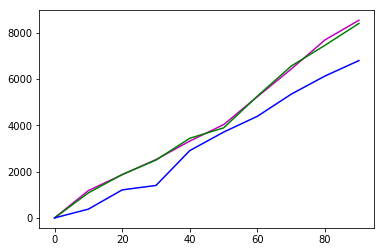

In [18]:
plt.plot(np.array(num_of_zeros),np.array(E_DFT),'-m')
plt.plot(np.array(num_of_zeros),np.array(E_DCT),'-g')
plt.plot(np.array(num_of_zeros),np.array(E_HAAR),'-b')